In [15]:
# Prolog - Auto Generated #
import os, uuid, matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot
import pandas

import sys
sys.tracebacklimit = 0

os.chdir(u'C:/Users/sarah/PythonEditorWrapper_bde63891-aa00-4387-8af5-e7657810f751')
dataset = pandas.read_csv('input_df_34a61f17-bcd7-4f8f-b234-aed61d253f7c.csv')

matplotlib.pyplot.figure(figsize=(5.55555555555556,4.16666666666667), dpi=72)
matplotlib.pyplot.show = lambda args=None,kw=None: matplotlib.pyplot.savefig(str(uuid.uuid1()))
# Original Script. Please update your script content here and once completed copy below section back to the original editing window 
#
# O código a seguir para criar um dataframe e remover as linhas duplicadas sempre é executado e age como um preâmbulo para o script: 

# dataset = pandas.DataFrame(EPS, Ano, Trimestre, Mês, Dia)
# dataset = dataset.drop_duplicates()

In [16]:
##Importações
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Convertendo a coluna EPS em float
dataset[['EPS']] = dataset[['EPS']].replace(regex=r',', value='.') #substituindo ',' por '.'
dataset[['EPS']] = dataset[['EPS']].apply(pd.to_numeric)  #transformando em numerico

##Criando um dataframe com os os anos, os meses e os picos 
anos = []
meses = []
picos = []

for i in dataset['Ano'].unique():
  for j in dataset['Mês'].unique():
    anos.append(i)
    meses.append(j)
    picos.append(dataset[dataset['Ano'] == i] [dataset['Mês'] == j] ['EPS'].max())

In [17]:
#Adicionando uma coluna com os valores numericos dos meses para que seja possivel ordenar
#o DataFrame de acordo com o tempo.

mesesInt = {'janeiro': 1,
           'fevereiro': 2,
            'março': 3,
            'abril': 4,
            'maio': 5,
            'junho': 6,
            'julho': 7,
            'agosto': 8,
            'setembro': 9,
            'outubro': 10,
            'novembro': 11,
            'dezembro': 12}

mesInt = []

for i in meses:
    mesInt.append(mesesInt[i])

print(mesInt)

[4, 2, 5, 3]


In [18]:
#Criando o dataframe
datas_picos = pd.DataFrame({
    'Pico': picos,
    'Ano': anos,
    'Mês': meses,
    'MêsInt': mesInt,
})

datas_picos

,Pico,Ano,Mês,MêsInt
0,269.0,2022,abril,4
1,505.0,2022,fevereiro,2
2,242.0,2022,maio,5
3,135.0,2022,março,3


In [19]:
#Adicionando coluna com a data no formato 'mes-ano'
datas_picos['Data'] = datas_picos['MêsInt'].astype(str) + '-' + datas_picos['Ano'].astype(str)

datas_picos = datas_picos.sort_values(by=['Ano', 'MêsInt'])
datas_picos = datas_picos.reset_index(drop=True)
datas_picos

,Pico,Ano,Mês,MêsInt,Data
0,505.0,2022,fevereiro,2,2-2022
1,135.0,2022,março,3,3-2022
2,269.0,2022,abril,4,4-2022
3,242.0,2022,maio,5,5-2022


In [20]:
# Identificando que valores estão dentro, acima ou abaixo do padrão, considerando o mes anterior
    #Acima: mais de 50% maior que o mês anterior
    #Abaixo: mais de 50% menor que o mês anterior

supper = np.ma.masked_array([datas_picos.iloc[0, 0]], mask=[True]) #Valores acima (anomalias)
slower = np.ma.masked_array([datas_picos.iloc[0, 0]], mask=[True]) #Valores abaixo (anomalias)
smiddle = np.ma.masked_array([datas_picos.iloc[0, 0]], mask=[False]) #Valores dentro 

for i in datas_picos.index[1:]:  
  upper = datas_picos.iloc[(i-1), 0] * 1.5 #limite superior de anomalias 
  lower = datas_picos.iloc[(i-1), 0] * 0.5 #limite inferior de anomalias

  atual = datas_picos.iloc[i, 0] #ponto em questao

  #Criando listas mascaradas 
  supper = np.ma.append(supper, np.ma.masked_array([atual], mask=[atual < upper]))
  slower = np.ma.append(slower, np.ma.masked_array([atual], mask=[atual > lower]))
  smiddle = np.ma.append(smiddle, np.ma.masked_array([atual], mask=[(atual < lower) | (atual > upper)]))

print(smiddle.mask, supper.mask, slower.mask)

[False  True  True False] [ True  True False  True] [ True False  True  True]


In [21]:
%matplotlib inline

In [22]:
#Funcao que plota uma seta e um texto indicando anomalias superiores
def anomalias_superiores(i):
    ax.annotate('Anomalia',
                    xy=(datas[i], supper.data[i]), 
                    xytext=(datas[i], supper.data[i] - (slower.data.max() - slower.data.min())/7), textcoords='data',
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    horizontalalignment='center', verticalalignment='top')

In [23]:
#Funcao que plota uma seta e um texto indicando anomalias inferiores
def anomalias_inferiores(i):
    ax.annotate('Anomalia',
                xy=(datas[i], slower.data[i]), 
                xytext=(datas[i], slower.data[i] + (slower.data.max() - slower.data.min())/5.6), textcoords='data',
                arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='center', verticalalignment='top')
            

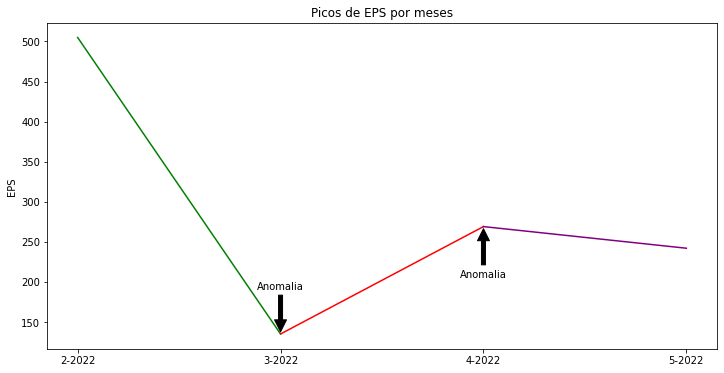

In [27]:
##Plotando o grafico
datas = datas_picos['Data']
fig, ax = plt.subplots(figsize=(12,6))
plt.title('Picos de EPS por meses')
plt.ylabel('EPS')
#plt.figure(figsize=(10,10))

#Quando todos os pontos estiverem na mesma categoria (todos padrão, anomalos para cima ou anomalos 
#para baixo), o .mask será uma variável escalavel contendo False, impossível de se percorrer.
#Então, inicialmente, serão tratados esses casos, para posterioremente nao ter erro de index.

#Caso todos os pontos estiverem dentro do padrao
if type(smiddle.mask) == np.bool_ and smiddle.mask == False:
    plt.plot(datas, smiddle.data, color='purple')

#Caso todos os pontos estiverem acima do padrão
elif type(supper.mask) == np.bool_ and supper.mask == False:
    plt.plot(datas, supper.data, color='red')
    
    for i in range(len(supper))[1:]:
        anomalias_superiores(i)

#Caso todos os pontos estiverem abaixo do padrão    
elif type(slower.mask) == np.bool_ and slower.mask == False:
    plt.plot(datas, slower.data, color='green')
    
    for i in range(len(slower))[1:]:
        anomalias_inferiores(i)

else:
    for i in range(len(smiddle))[1:]:

        #As linhas normais serão plotadas em roxo
        if ~(type(smiddle.mask) == np.bool_) and ~smiddle.mask[i]:
            plt.plot(datas[i-1 : i+1], smiddle.data[i-1 : i+1], color='purple')

        #As linhas que levam a anomalias superiores serão plotadas em vermelho
        elif ~supper.mask[i]:
            plt.plot(datas[i-1 : i+1], supper.data[i-1 : i+1], color='red')

            #Seta e anotação
            anomalias_superiores(i);

        #As linhas que levam a anomalias inferiores serão plotadas em verde
        elif ~slower.mask[i]:
            plt.plot(datas[i-1 : i+1], slower.data[i-1 : i+1], color='green')

            #Seta e anotação
            anomalias_inferiores(i)     

plt.show()